In [26]:
import pandas as pd
import numpy as np
import os as os
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

### Load train data
- iterate through train data folder 
- feature engineer the **country** and **league** from parent folder name
- join the loaded csv files by rows

In [2]:
df = pd.DataFrame()
for root, directory, files in os.walk("data/train", topdown=False):
    if files:
        for file in files:
            tmp = pd.read_csv(f"{root}/{file}")
            tmp["league"] = int(root.split("\\")[2])
            tmp["country"] = root.split("\\")[1]
            tmp["season"] = int(file[:2]) # no. of season - 00/01 - 0th season, 21/22 - 21st season
            df = pd.concat([df, tmp], axis = 0)

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,LB.1,LB.2,HT,AT,Unnamed: 24,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 53,Unnamed: 106
0,B1,20/05/01,Mechelen,Lierse,1.0,1.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,17/09/00,Germinal,Club Brugge,2.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,14/10/00,Beveren,Standard,0.0,3.0,A,0.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,06/09/00,Lokeren,Mechelen,3.0,2.0,H,0.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,27/08/00,Charleroi,Antwerp,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(155173, 215)

Drop all completely empty columns which there is a lot of, dropped 41 empty columns in total.

In [5]:
df.dropna(how='all', axis=1, inplace=True) 

In [6]:
df.shape

(155173, 174)

In [7]:
df.to_csv("final.csv")

# Data Exploration

In [8]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,GBH,GBD,GBA,IWH,IWD,IWA,...,ABP,SOH,SOD,SOA,LBAHH,LBAHA,LBAH,LB,LB.1,LB.2
count,154864.000000,154841.000000,154813.000000,154820.000000,88060.000000,88123.000000,88106.000000,150729.000000,150735.000000,150766.000000,...,6671.000000,6599.000000,6613.000000,6614.000000,5470.000000,5470.000000,5458.000000,110.000000,110.000000,107.000000
mean,2.216358,1.130883,0.655636,0.494206,2.275366,3.381363,3.950892,2.335784,3.382514,3.753866,...,20.914406,2.216488,3.391382,3.833776,1.911200,1.924793,-0.350500,1.985955,3.258182,3.808477
std,21.861876,1.108967,0.809382,0.708167,1.039952,0.613622,2.195107,1.155085,0.713629,2.251540,...,17.212936,0.983779,0.481409,2.078919,0.174042,0.124442,0.588259,0.434470,0.170338,1.309792
min,0.000000,-1.000000,0.000000,0.000000,1.030000,1.250000,1.030000,1.010000,1.500000,1.030000,...,0.000000,1.060000,2.380000,1.140000,-2.250000,-0.500000,-2.250000,1.360000,3.000000,1.900000
25%,1.000000,0.000000,0.000000,0.000000,1.730000,3.100000,2.650000,1.750000,3.050000,2.550000,...,10.000000,1.700000,3.200000,2.620000,1.840000,1.840000,-0.750000,1.684250,3.200000,2.800000
50%,1.000000,1.000000,0.000000,0.000000,2.100000,3.250000,3.350000,2.100000,3.200000,3.200000,...,20.000000,2.100000,3.250000,3.250000,1.920000,1.920000,-0.250000,1.909000,3.200000,3.500000
75%,2.000000,2.000000,1.000000,1.000000,2.450000,3.450000,4.500000,2.500000,3.450000,4.200000,...,30.000000,2.400000,3.400000,4.500000,2.000000,2.000000,0.000000,2.237500,3.250000,4.333000
max,998.000000,13.000000,7.000000,6.000000,24.000000,11.000000,34.000000,30.000000,16.000000,70.000000,...,150.000000,13.000000,8.000000,21.000000,3.400000,4.000000,9.000000,3.500000,4.000000,8.000000


In [32]:
na_vals = df.isna().sum()
na_vals = na_vals/df.shape[0]*100
na_vals

Div          0.200421
Date         0.236510
HomeTeam     0.901574
AwayTeam     0.903508
FTHG         0.199133
              ...    
LB          99.929111
LB.1        99.929111
LB.2        99.931045
HT          99.284669
AT          99.280158
Length: 174, dtype: float64

In [33]:
na_vals = df[df["season"] > 17].isna().sum()
na_vals = na_vals/df[df["season"] > 17].shape[0]*100
na_vals

Div           0.000000
Date          0.123618
HomeTeam      0.000000
AwayTeam      0.000000
FTHG          0.069081
               ...    
LB          100.000000
LB.1        100.000000
LB.2        100.000000
HT          100.000000
AT          100.000000
Length: 174, dtype: float64

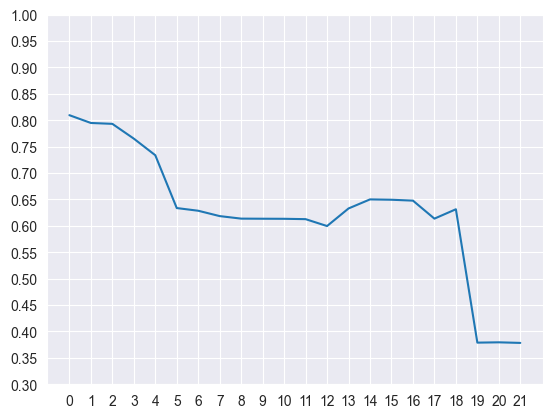

In [91]:
na_vals = [df[df["season"]==i].isna().sum().sum()/(df[df["season"]==i].shape[0]*df[df["season"]==i].shape[1]) for i in range(0,22)]
plt.xticks(range(0,22))
plt.ylim(0.3, 1)
plt.locator_params(axis='y', nbins=14)
plt.plot(na_vals)
plt.gca().ticklabel_format(axis='y', style='plain', scilimits=(0, 0))